In [6]:
from google.colab import files
uploaded = files.upload()
!unzip -q IMDB.zip

import pandas as pd
df = pd.read_csv("imdb_top_1000.csv")
df.head()

Saving IMDB.zip to IMDB (1).zip
replace imdb_top_1000.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [8]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [9]:
import numpy as np

# Convert 'Released_Year' to numeric (some entries might be 'TV series' or malformed)
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Clean 'Runtime' column: remove 'min' and convert to integer
df['Runtime'] = df['Runtime'].str.replace('min', '').str.strip()
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

# Clean 'Gross': remove commas and convert to float
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# Handle missing values in 'Certificate'
df['Certificate'] = df['Certificate'].fillna('Not Rated')

# Fill 'Meta_score' missing values with median (reasonable imputation for rating data)
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median())

# Optional: Drop rows with critical missing values in essential numeric fields
df.dropna(subset=['Released_Year', 'Runtime', 'Gross'], inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

In [10]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974.0,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957.0,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


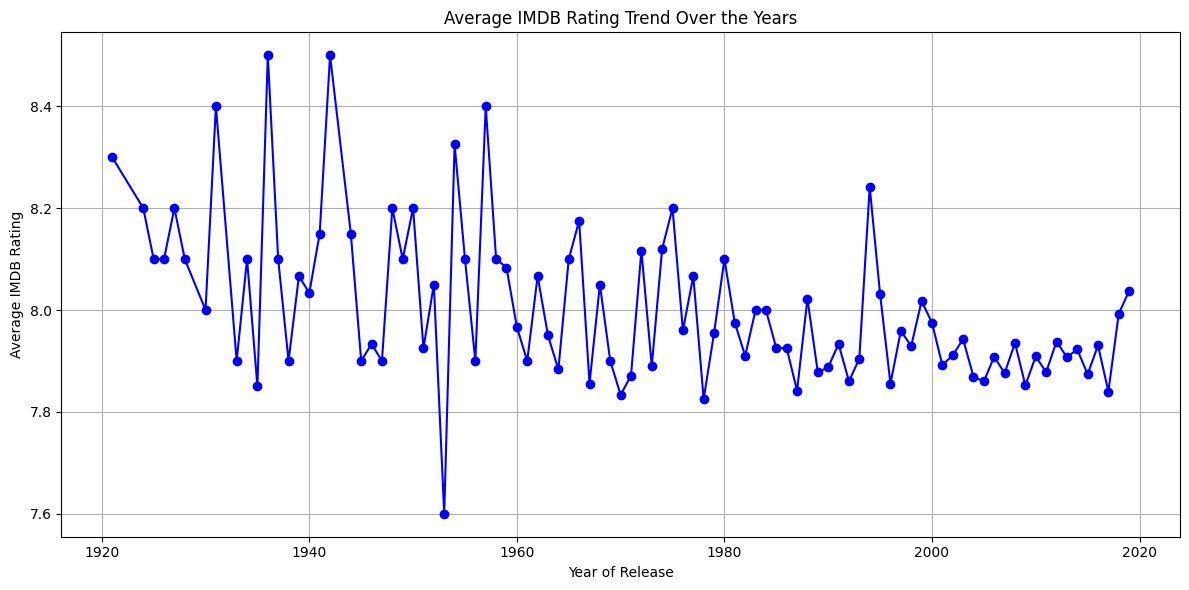

In [11]:
import matplotlib.pyplot as plt

# Group by year and calculate mean IMDB rating
ratings_by_year = df.groupby('Released_Year')['IMDB_Rating'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(ratings_by_year['Released_Year'], ratings_by_year['IMDB_Rating'], marker='o', linestyle='-', color='b')

plt.title('Average IMDB Rating Trend Over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Average IMDB Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-15-14828af91d48>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts, x='Genre', y='Movie Count', palette='viridis')


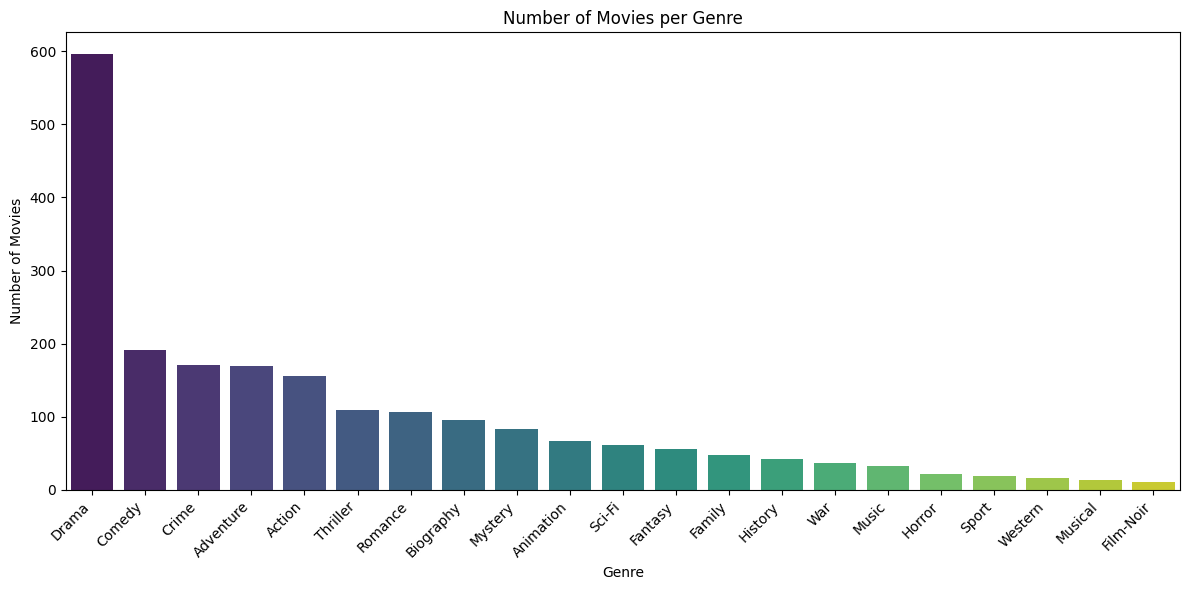

In [15]:
import seaborn as sns

# Since movies can have multiple genres separated by commas, split and explode the Genre column
genre_exploded = df['Genre'].str.split(',').explode().str.strip()

# Count the number of movies per genre
genre_counts = genre_exploded.value_counts().reset_index()
genre_counts.columns = ['Genre', 'Movie Count']

# Plot using seaborn barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_counts, x='Genre', y='Movie Count', palette='viridis')
plt.title('Number of Movies per Genre')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

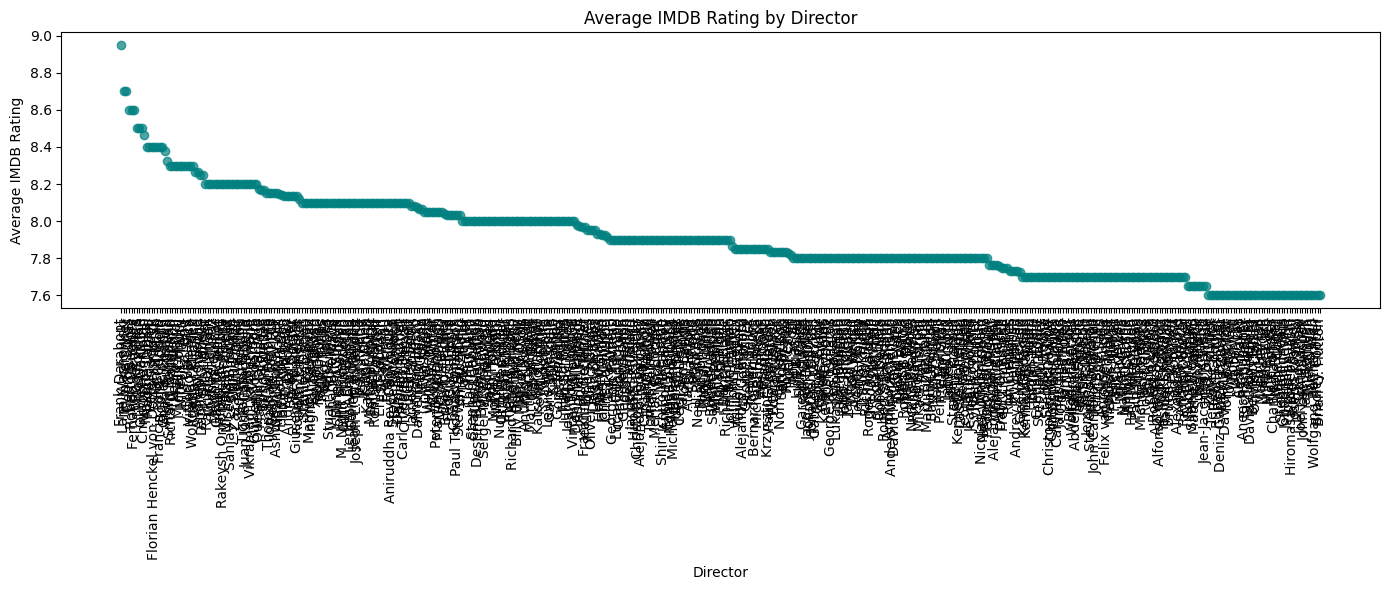

In [16]:
# Calculate average IMDB rating per director
director_ratings = df.groupby('Director')['IMDB_Rating'].mean().reset_index()

# Sort directors by average rating to make the plot clearer
director_ratings = director_ratings.sort_values(by='IMDB_Rating', ascending=False)

# Plot scatter plot
plt.figure(figsize=(14, 6))
plt.scatter(director_ratings['Director'], director_ratings['IMDB_Rating'], color='teal', alpha=0.7)
plt.xticks(rotation=90)
plt.title('Average IMDB Rating by Director')
plt.xlabel('Director')
plt.ylabel('Average IMDB Rating')
plt.tight_layout()
plt.show()

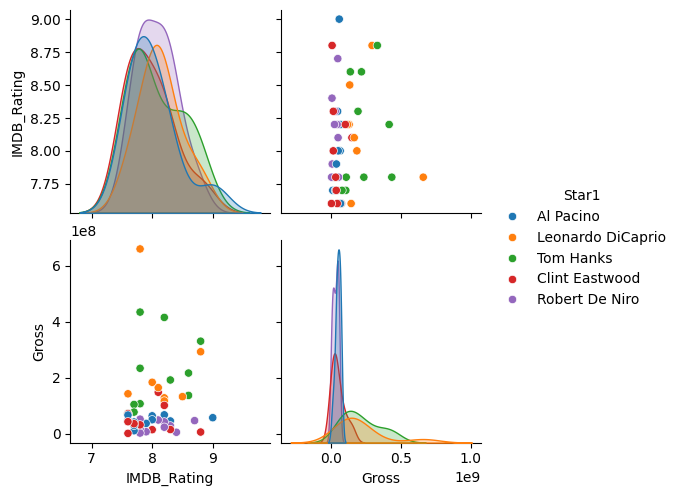

In [20]:
# Take a subset with numeric columns and one star as hue
subset = df[['IMDB_Rating', 'Gross', 'Star1']].dropna()

# For better visualization, select top 5 most frequent stars in Star1
top_stars = subset['Star1'].value_counts().nlargest(5).index
subset = subset[subset['Star1'].isin(top_stars)]

# Plot pairplot with hue by Star1
sns.pairplot(subset, vars=['IMDB_Rating', 'Gross'], hue='Star1')
plt.show()

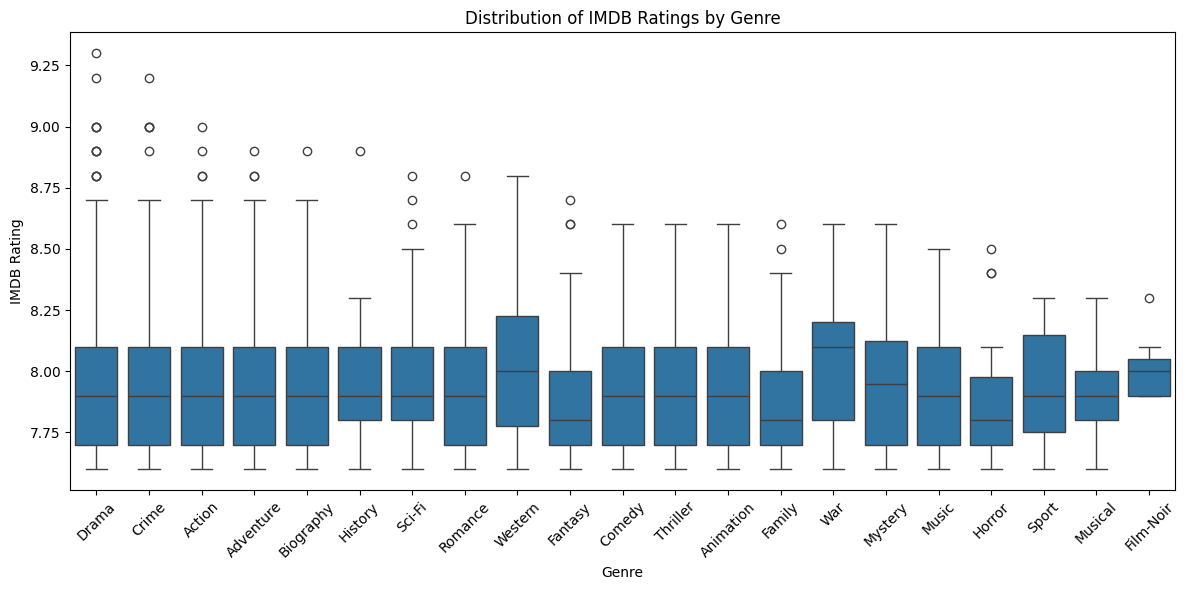

In [21]:
# Since 'Genre' contains multiple genres separated by commas,
# we will explode the genres so each genre gets its own row.

# Step 1: Split the 'Genre' column by comma and explode
df_genres = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre')

# Step 2: Create the boxplot of IMDB_Rating grouped by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='IMDB_Rating', data=df_genres)
plt.title('Distribution of IMDB Ratings by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('IMDB Rating')
plt.tight_layout()
plt.show()

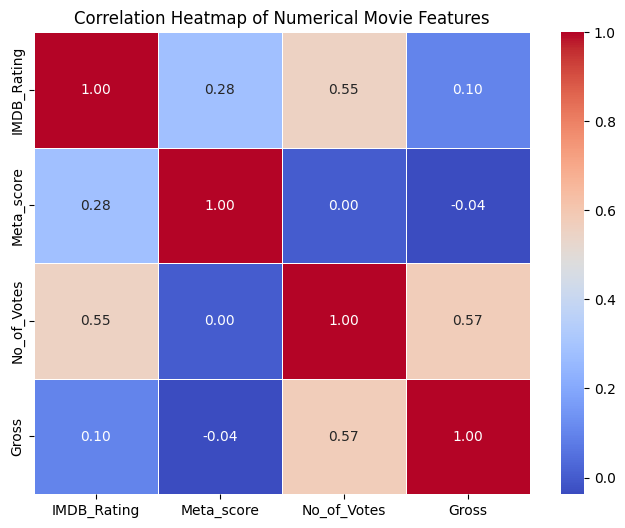

In [22]:
# Select relevant numerical columns for correlation analysis
numerical_cols = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']

# Calculate the correlation matrix, automatically ignoring NaNs
corr_matrix = df[numerical_cols].corr()

# Plot the heatmap with annotations for better readability
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Movie Features')
plt.show()